In [1]:
%cd ../tti-explorer
%pip install -q .

/home/gejinchen/Desktop/l48/project/tti-explorer
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tti
from tti import simulation

import GPy
import GPyOpt
from numpy.random import seed
import matplotlib

In [3]:
# Define the function to optimize
def f(params):
    # params has shape (1, 2)
    theta = params[0]
    config_details = {0 : {"name": "p_under18", "config": "case_config"}, 
                     1 : {"name": "go_to_school_prob", "config": "policy_config"}}
    R = simulation(theta, config_details)
    return R

In [4]:
bounds =[{'name': 'var_1', 'type': 'continuous', 'domain': (0, 1)},
         {'name': 'var_2', 'type': 'continuous', 'domain': (0, 1)}]

In [5]:
# Creates GPyOpt object with the model and anquisition fucntion
seed(42)
myBopt2D = GPyOpt.methods.BayesianOptimization(f,
                                              domain=bounds,
                                              model_type = 'GP',
                                              acquisition_type='EI',  
                                              normalize_Y = True,
                                              acquisition_weight = 2)    

In [6]:
max_iter = 40  # maximum time 40 iterations
max_time = 120  # maximum time 120 seconds

myBopt2D.run_optimization(max_iter,max_time,verbosity=False)    

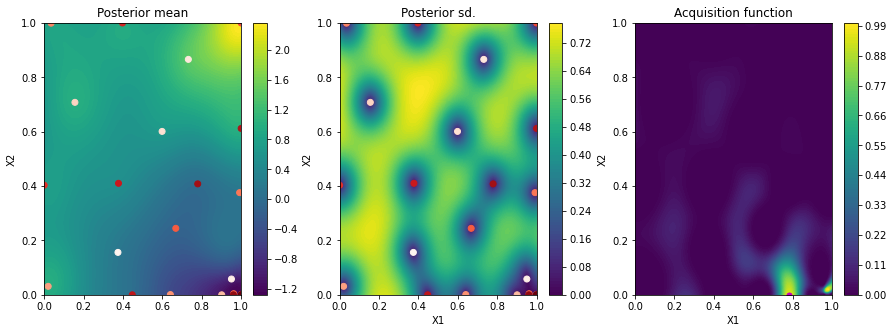

In [7]:
myBopt2D.plot_acquisition()

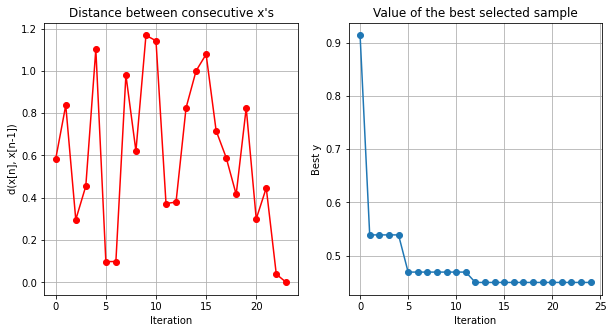

In [8]:
myBopt2D.plot_convergence()

In [9]:
# Optimum for x or argmin
myBopt2D.x_opt

array([0.96207538, 0.00402528])

In [10]:
# Optimum for fx or min
myBopt2D.fx_opt

0.44952213075431746